In [180]:
pip install nltk


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [181]:
import nltk
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')    
nltk.download('punkt_tab')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/mahletgetu/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahletgetu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mahletgetu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mahletgetu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [182]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from nltk import tokenize

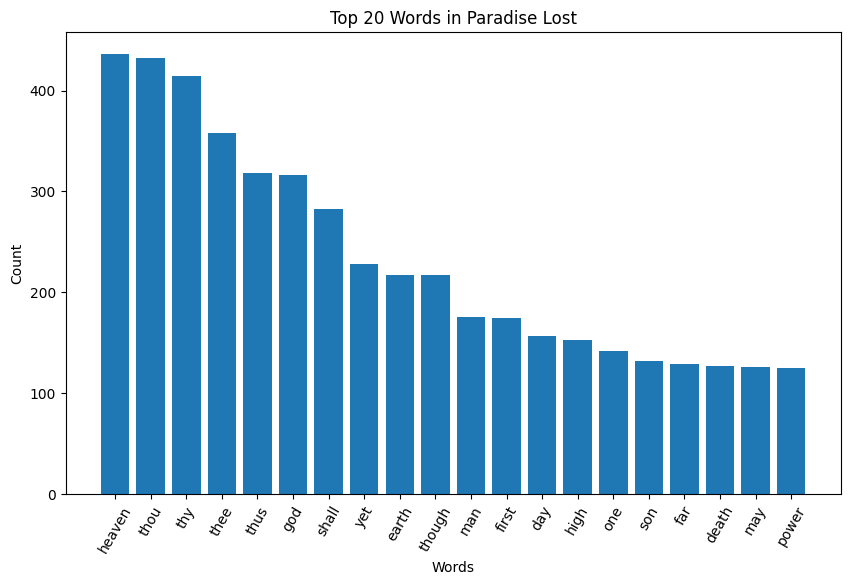

Top 20 Words: [('heaven', 436), ('thou', 432), ('thy', 414), ('thee', 358), ('thus', 318), ('god', 316), ('shall', 283), ('yet', 228), ('earth', 217), ('though', 217), ('man', 176), ('first', 175), ('day', 157), ('high', 153), ('one', 142), ('son', 132), ('far', 129), ('death', 127), ('may', 126), ('power', 125)]


In [183]:
def process_paradise_lost():
    words = gutenberg.words('milton-paradise.txt')

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    processed_words = [
        lemmatizer.lemmatize(word.lower())
        for word in words
        if word.lower() not in stop_words
        and word.isalpha() 
        and len(word) > 2 
    ]

    word_counts = Counter(processed_words)

    top_words = word_counts.most_common(20)
    word_list = []
    count_list = []

    for word, count in top_words:
        word_list.append(word)
        count_list.append(count)
    plt.figure(figsize=(10, 6))
    plt.bar(word_list, count_list)
    plt.xticks(rotation=60)
    plt.title('Top 20 Words in Paradise Lost')
    plt.ylabel('Count')
    plt.xlabel('Words')
    plt.show()

    return top_words

top_words = process_paradise_lost()
print("Top 20 Words:", top_words)


In [184]:
# By ensuring that a word's derivative forms are mapped to their relevant base root, lemmatization improves the accuracy of the analysis. By eliminating word ends without taking context into account, stemming may oversimplify.



In [185]:
sentences = [" ".join(sent).strip() for sent in gutenberg.sents('milton-paradise.txt')]

sid = SentimentIntensityAnalyzer()

positive_sentences = []
negative_sentences = []
neutral_sentences = []

for x in sentences:
    scores = sid.polarity_scores(x)
    if scores['compound'] > 0.5: 
        positive_sentences.append((x, scores['compound']))
    elif scores['compound'] < -0.5: 
        negative_sentences.append((x, scores['compound']))
    else:
        neutral_sentences.append((x, scores['neu']))

positive_sentences = sorted(positive_sentences, key=lambda x: x[1], reverse=True)
negative_sentences = sorted(negative_sentences, key=lambda x: x[1])
neutral_sentences = sorted(neutral_sentences, key=lambda x: x[1], reverse=True)

top_positive = positive_sentences[:5]
top_negative = negative_sentences[:5]
top_neutral = neutral_sentences[:5]

print("Top 5 Positive Sentences:")
for sentence, score in top_positive:
    print(f"{sentence} (Compound: {score})")

print("\nTop 5 Negative Sentences:")
for sentence, score in top_negative:
    print(f"{sentence} (Compound: {score})")

print("\nTop 5 Neutral Sentences:")
for sentence, score in top_neutral:
    print(f"{sentence} (Neutral: {score})")

Top 5 Positive Sentences:
Round he surveys ( and well might , where he stood So high above the circling canopy Of night ' s extended shade ,) from eastern point Of Libra to the fleecy star that bears Andromeda far off Atlantick seas Beyond the horizon ; then from pole to pole He views in breadth , and without longer pause Down right into the world ' s first region throws His flight precipitant , and winds with ease Through the pure marble air his oblique way Amongst innumerable stars , that shone Stars distant , but nigh hand seemed other worlds ; Or other worlds they seemed , or happy isles , Like those Hesperian gardens famed of old , Fortunate fields , and groves , and flowery vales , Thrice happy isles ; but who dwelt happy there He staid not to inquire : Above them all The golden sun , in splendour likest Heaven , Allured his eye ; thither his course he bends Through the calm firmament , ( but up or down , By center , or eccentrick , hard to tell , Or longitude ,) where the great 

In [186]:
# The book's flowery style and antiquated wording make it challenging to accurately determine sentiment. The algorithm gives high ratings to positive statements, like descriptions of Eden, because they contain words like "happy" and "light," but it ignores the larger context. Negative lines, which frequently discuss hopelessness or evil, receive poor scores, but the text's subtlety and thoughtful tone are lost. Since certain words are obviously descriptive or emotional but lack the explicit signals the technology recognizes, neutral sentences appear to be incorrectly labeled. Overall, VADER's accuracy for complex, literary writings like this one is limited by its emphasis on contemporary, simple language.

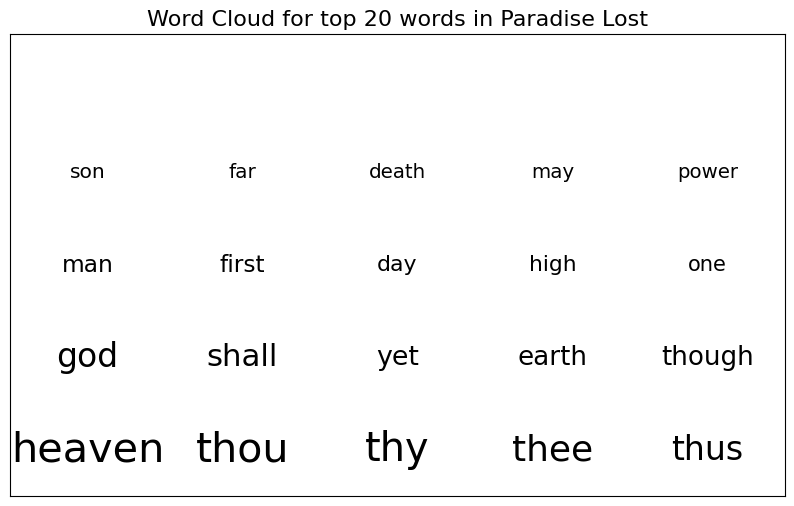

In [187]:
top_words = [
    ('heaven', 436), ('thou', 432), ('thy', 414), ('thee', 358), 
    ('thus', 318), ('god', 316), ('shall', 283), ('yet', 228), 
    ('earth', 217), ('though', 217), ('man', 176), ('first', 175), 
    ('day', 157), ('high', 153), ('one', 142), ('son', 132), 
    ('far', 129), ('death', 127), ('may', 126), ('power', 125)
]

def text_size(count):
    return 8 + count / 200 * 10

plt.figure(figsize=(10, 6))

for i, (word, count) in enumerate(top_words):
    plt.text(
        i % 5 * 20 + 10,  
        i // 5 * 20 + 10, 
        word,
        ha='center',
        va='center',
        size=text_size(count)
    )

plt.axis([0, 100, 0, 100]) 
plt.xticks([]) 
plt.yticks([]) 
plt.title("Word Cloud for top 20 words in Paradise Lost", fontsize=16)
plt.show()